<a href="https://colab.research.google.com/github/arielle-k/Classification-and-regression-in-DL/blob/main/Classification_et_regression_DL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Classification binaire

## Importation des packages


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
#import tensorflow as tf
#from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.datasets import imdb
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras import optimizers
from tensorflow.keras import losses
from tensorflow.keras import metrics
from sklearn.metrics import confusion_matrix, classification_report



In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.sequence import pad_sequences

## Chargement des donnees

In [ ]:
#charger les donnees imdb
max_features = 10000 #nombres de mots à considerer comme features
max_len = 500 # Couper les textes après ce nombre de mots
(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=max_features)

In [ ]:
X_train.shape

(25000,)

In [ ]:
X_train

array([list([1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]),
       list([1, 194, 1153, 194, 8255, 78, 228,

In [ ]:
y_train

array([1, 0, 0, ..., 0, 1, 0])

In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer
from wordcloud import WordCloud

In [ ]:
from tensorflow.keras.datasets import imdb

# Charger le dataset IMDB
(train_data, train_labels), (test_data, test_labels) = imdb.load_data()

# Charger le dictionnaire qui mappe les indices aux mots
word_index = imdb.get_word_index()

# Inverser le dictionnaire pour obtenir un mapping de l'indice au mot
reverse_word_index = {value: key for (key, value) in word_index.items()}

# Fonction pour convertir une critique de film de la forme d'indices à la forme de mots
def decode_review(text):
    return ' '.join([reverse_word_index.get(i - 3, '?') for i in text])

# Afficher une critique de film décodée
decoded_review = decode_review(train_data[0])
print("Critique de film décodée :")
print(decoded_review)

# Afficher le label correspondant (0 pour négatif, 1 pour positif)
print("Label correspondant :", train_labels[0])


Critique de film décodée :
? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert redford's is an amazing actor and now the same being director norman's father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for retail and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also congratulations to the two little boy's that played the part's of norman and paul they were just brilliant children are often left out of the praising list i think because the stars that play them all grown up are such a big profile for the whole film but these childre

In [ ]:
# Padding des textes
# Cette étape ajuste toutes les séquences de textes à une longueur fixe définie par 'max_len'.
# Le padding ajoute des zéros au début des séquences plus courtes pour atteindre 'max_len'.

# Appliquer le padding sur les données d'entraînement
X_train = pad_sequences(X_train, maxlen=max_len)

# Appliquer le padding sur les données de test
X_test = pad_sequences(X_test, maxlen=max_len)

In [ ]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Exemple de séquences de texte
sequences = [
    [1, 2, 3],
    [4, 5, 6, 7,78],
    [8, 9]
]

# Longueur maximale des séquences après padding
max_len = 5

# Appliqu
padded_sequences = pad_sequences(sequences, maxlen=max_len)

print(padded_sequences)

[[ 0  0  1  2  3]
 [ 4  5  6  7 78]
 [ 0  0  0  8  9]]


## Modèle du deep learning

In [ ]:
#construction du modèle MLP (Perceptron Multi Couche)
model=models.Sequential()
#Ajout d'une couche d'embedding pour convertir les indices de mots en vecteur d'une dimension
model.add(layers.Embedding(max_features, 200, input_length=max_len))
#aplatir la sortie de la couche d'embedding  en un vecteur 1D
model.add(layers.Flatten())
#ajoute une couche Dropout pour reduire le surapprentissage en mettant à 0 50% des neurones
#model.add(layers.Dropout(0.5))
#ajouter une couche cache dense avec 128 neurones et ue fonction d'activation ReLU pour l'apprentissage non linéaire
model.add(layers.Dense(128, activation='relu'))
#ajouter une couche de sortie Dense avec l'activation sigmoid pour predire une sortie binaire(0 ou 1)
model.add(layers.Dense(1, activation='sigmoid'))


In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 500, 200)          2000000   
                                                                 
 flatten_1 (Flatten)         (None, 100000)            0         
                                                                 
 dense_2 (Dense)             (None, 128)               12800128  
                                                                 
 dense_3 (Dense)             (None, 1)                 129       
                                                                 
Total params: 14800257 (56.46 MB)
Trainable params: 14800257 (56.46 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
#compiler le modele
model.compile(
    optimizer='rmsprop',
    loss='binary_crossentropy',
    metrics=['accuracy']
)


In [ ]:
#entrainer le modele
model.fit(X_train,y_train,
          batch_size=32,
          epochs=5,
          validation_split=0.2)

Epoch 1/5
625/625 [==============================] - 184s 292ms/step - loss: 0.5065 - accuracy: 0.7173 - val_loss: 0.3312 - val_accuracy: 0.8562
Epoch 2/5
625/625 [==============================] - 179s 286ms/step - loss: 0.1465 - accuracy: 0.9456 - val_loss: 0.3588 - val_accuracy: 0.8622
Epoch 3/5
625/625 [==============================] - 179s 287ms/step - loss: 0.0133 - accuracy: 0.9960 - val_loss: 0.6040 - val_accuracy: 0.8536
Epoch 4/5
625/625 [==============================] - 174s 278ms/step - loss: 0.0013 - accuracy: 0.9996 - val_loss: 0.7747 - val_accuracy: 0.8498
Epoch 5/5
625/625 [==============================] - 176s 282ms/step - loss: 7.2576e-05 - accuracy: 1.0000 - val_loss: 0.8339 - val_accuracy: 0.8480


In [ ]:
history=model.history

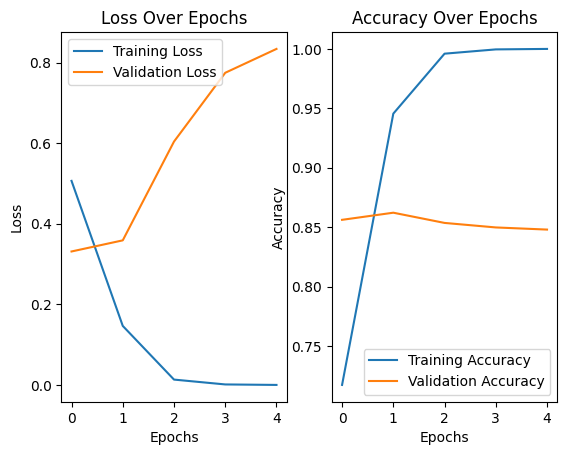

In [ ]:

# Courbe de perte
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Courbe de précision
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [ ]:
# Évaluer le modèle
score, acc = model.evaluate(X_test, y_test)
print(f'Test score: {score}')
print(f'Test accuracy: {acc}')

782/782 [==============================] - 26s 33ms/step - loss: 0.8185 - accuracy: 0.8479
Test score: 0.8184639811515808
Test accuracy: 0.8478800058364868


In [ ]:
# Prédictions
y_pred = (model.predict(X_test) > 0.5).astype("int32")

782/782 [==============================] - 26s 33ms/step


In [ ]:
# Matrice de confusion
conf_matrix = confusion_matrix(y_test, y_pred)

In [ ]:
# Rapport de classification
class_report = classification_report(y_test, y_pred)
# Afficher le rapport de classification
print('Classification Report')
print(class_report)

Classification Report
              precision    recall  f1-score   support

           0       0.86      0.84      0.85     12500
           1       0.84      0.86      0.85     12500

    accuracy                           0.85     25000
   macro avg       0.85      0.85      0.85     25000
weighted avg       0.85      0.85      0.85     25000



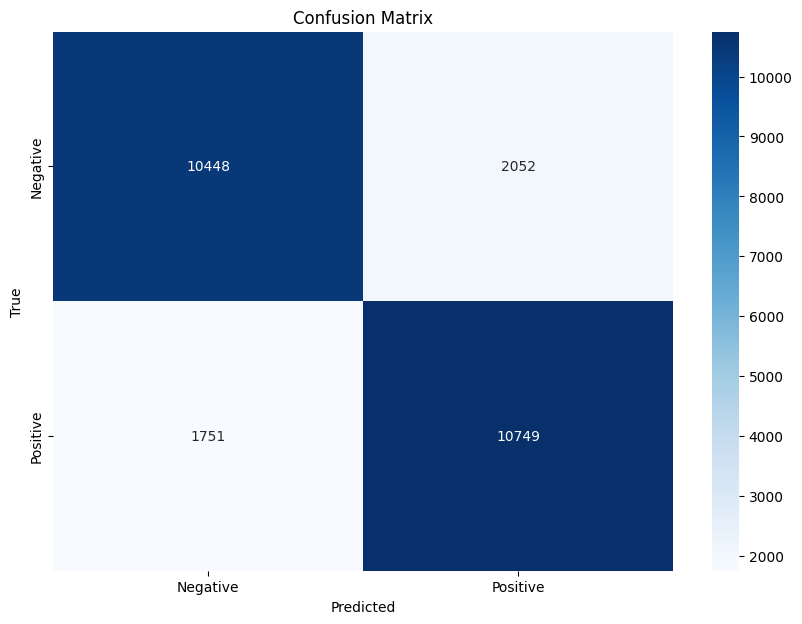

In [ ]:
# Afficher la matrice de confusion
plt.figure(figsize=(10,7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# Prediction d'une variable Quantitative

In [ ]:
# importation des packages
import tensorflow as tf
from tensorflow.keras.datasets import boston_housing
from tensorflow.keras import models, layers, optimizers, losses, metrics
from sklearn.preprocessing import StandardScaler
import numpy as np


In [ ]:
#charger les donnees
(X_train, y_train), (X_test, y_test) = boston_housing.load_data()

57026/57026 [==============================] - 0s 0us/step


In [ ]:
X_train

array([[1.23247e+00, 0.00000e+00, 8.14000e+00, ..., 2.10000e+01,
        3.96900e+02, 1.87200e+01],
       [2.17700e-02, 8.25000e+01, 2.03000e+00, ..., 1.47000e+01,
        3.95380e+02, 3.11000e+00],
       [4.89822e+00, 0.00000e+00, 1.81000e+01, ..., 2.02000e+01,
        3.75520e+02, 3.26000e+00],
       ...,
       [3.46600e-02, 3.50000e+01, 6.06000e+00, ..., 1.69000e+01,
        3.62250e+02, 7.83000e+00],
       [2.14918e+00, 0.00000e+00, 1.95800e+01, ..., 1.47000e+01,
        2.61950e+02, 1.57900e+01],
       [1.43900e-02, 6.00000e+01, 2.93000e+00, ..., 1.56000e+01,
        3.76700e+02, 4.38000e+00]])

In [ ]:
X_train.shape

(404, 13)

In [ ]:
y_train

array([15.2, 42.3, 50. , 21.1, 17.7, 18.5, 11.3, 15.6, 15.6, 14.4, 12.1,
       17.9, 23.1, 19.9, 15.7,  8.8, 50. , 22.5, 24.1, 27.5, 10.9, 30.8,
       32.9, 24. , 18.5, 13.3, 22.9, 34.7, 16.6, 17.5, 22.3, 16.1, 14.9,
       23.1, 34.9, 25. , 13.9, 13.1, 20.4, 20. , 15.2, 24.7, 22.2, 16.7,
       12.7, 15.6, 18.4, 21. , 30.1, 15.1, 18.7,  9.6, 31.5, 24.8, 19.1,
       22. , 14.5, 11. , 32. , 29.4, 20.3, 24.4, 14.6, 19.5, 14.1, 14.3,
       15.6, 10.5,  6.3, 19.3, 19.3, 13.4, 36.4, 17.8, 13.5, 16.5,  8.3,
       14.3, 16. , 13.4, 28.6, 43.5, 20.2, 22. , 23. , 20.7, 12.5, 48.5,
       14.6, 13.4, 23.7, 50. , 21.7, 39.8, 38.7, 22.2, 34.9, 22.5, 31.1,
       28.7, 46. , 41.7, 21. , 26.6, 15. , 24.4, 13.3, 21.2, 11.7, 21.7,
       19.4, 50. , 22.8, 19.7, 24.7, 36.2, 14.2, 18.9, 18.3, 20.6, 24.6,
       18.2,  8.7, 44. , 10.4, 13.2, 21.2, 37. , 30.7, 22.9, 20. , 19.3,
       31.7, 32. , 23.1, 18.8, 10.9, 50. , 19.6,  5. , 14.4, 19.8, 13.8,
       19.6, 23.9, 24.5, 25. , 19.9, 17.2, 24.6, 13

In [ ]:
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

In [ ]:
X_train

array([[-0.27224633, -0.48361547, -0.43576161, ...,  1.14850044,
         0.44807713,  0.8252202 ],
       [-0.40342651,  2.99178419, -1.33391162, ..., -1.71818909,
         0.43190599, -1.32920239],
       [ 0.1249402 , -0.48361547,  1.0283258 , ...,  0.78447637,
         0.22061726, -1.30850006],
       ...,
       [-0.40202987,  0.99079651, -0.7415148 , ..., -0.71712291,
         0.07943894, -0.67776904],
       [-0.17292018, -0.48361547,  1.24588095, ..., -1.71818909,
        -0.98764362,  0.42083466],
       [-0.40422614,  2.04394792, -1.20161456, ..., -1.30866202,
         0.23317118, -1.15392266]])

In [ ]:
# Construire le modèle MLP
model = models.Sequential()
# Ajouter une couche Dense d'entrée avec 64 neurones et une activation ReLU pour l'apprentissage non linéaire
model.add(layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)))
# Ajouter une deuxième couche Dense avec 64 neurones et une activation ReLU pour l'apprentissage non linéaire
model.add(layers.Dense(64, activation='relu'))
# Ajouter une couche de sortie Dense avec une seule neurone (prix de l'immobilier)
model.add(layers.Dense(1))
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 64)                896       
                                                                 
 dense_5 (Dense)             (None, 64)                4160      
                                                                 
 dense_6 (Dense)             (None, 1)                 65        
                                                                 
Total params: 5121 (20.00 KB)
Trainable params: 5121 (20.00 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 64)                896       
                                                                 
 dense_5 (Dense)             (None, 64)                4160      
                                                                 
 dense_6 (Dense)             (None, 1)                 65        
                                                                 
Total params: 5121 (20.00 KB)
Trainable params: 5121 (20.00 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
from tensorflow.keras.optimizers import RMSprop
# Compiler le modèle avec les paramètres suivants :
model.compile(
    optimizer=RMSprop(learning_rate=0.001),  # Optimiseur RMSprop avec un taux d'apprentissage de 0.001
    loss='mse',                             # Fonction de perte : Erreur quadratique moyenne (Mean Squared Error)
    metrics=['mae']                         # Métrique d'évaluation : Erreur absolue moyenne (Mean Absolute Error)
)

In [ ]:
history=model.fit(X_train, y_train,
          batch_size=16,
          epochs=100,
          validation_split=0.2)

Epoch 1/100
21/21 [==============================] - 1s 18ms/step - loss: 543.9380 - mae: 21.4082 - val_loss: 564.0357 - val_mae: 21.8666
Epoch 2/100
21/21 [==============================] - 0s 6ms/step - loss: 444.8388 - mae: 19.0323 - val_loss: 445.0263 - val_mae: 19.0642
Epoch 3/100
21/21 [==============================] - 0s 6ms/step - loss: 325.3712 - mae: 15.8178 - val_loss: 308.6328 - val_mae: 15.2695
Epoch 4/100
21/21 [==============================] - 0s 4ms/step - loss: 199.6405 - mae: 11.7603 - val_loss: 183.6448 - val_mae: 10.6981
Epoch 5/100
21/21 [==============================] - 0s 4ms/step - loss: 113.9608 - mae: 8.1770 - val_loss: 112.2998 - val_mae: 7.9607
Epoch 6/100
21/21 [==============================] - 0s 3ms/step - loss: 71.8065 - mae: 6.3618 - val_loss: 80.0688 - val_mae: 6.5806
Epoch 7/100
21/21 [==============================] - 0s 4ms/step - loss: 51.5554 - mae: 5.2319 - val_loss: 58.3337 - val_mae: 5.5135
Epoch 8/100
21/21 [==============================]

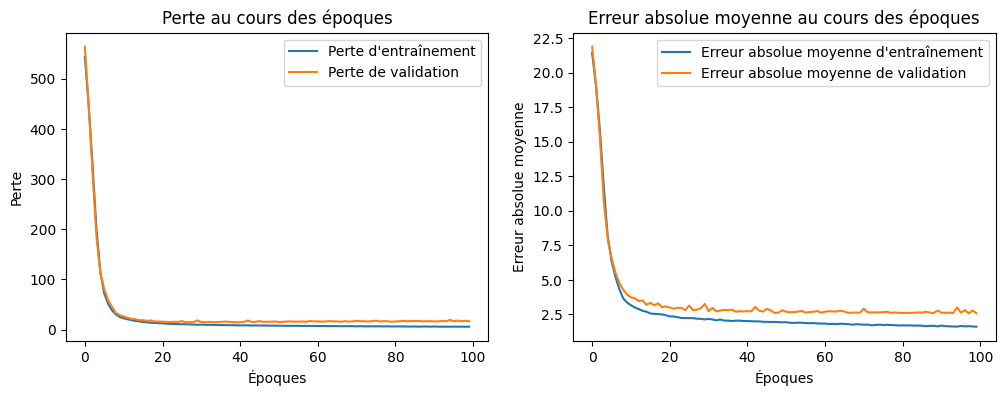

In [ ]:
#evaluation du modèle
# Tracer les courbes de perte et d'erreur absolue moyenne
plt.figure(figsize=(12, 4))

# Courbe de perte
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Perte d\'entraînement')
plt.plot(history.history['val_loss'], label='Perte de validation')
plt.title('Perte au cours des époques')
plt.xlabel('Époques')
plt.ylabel('Perte')
plt.legend()

# Courbe d'erreur absolue moyenne
plt.subplot(1, 2, 2)
plt.plot(history.history['mae'], label='Erreur absolue moyenne d\'entraînement')
plt.plot(history.history['val_mae'], label='Erreur absolue moyenne de validation')
plt.title('Erreur absolue moyenne au cours des époques')
plt.xlabel('Époques')
plt.ylabel('Erreur absolue moyenne')
plt.legend()

plt.show()


In [ ]:
# Évaluer le modèle
test_loss, test_mae = model.evaluate(X_test, y_test)
print(f'Perte sur les données de test: {test_loss}')
print(f'Erreur absolue moyenne sur les données de test: {test_mae}')

4/4 [==============================] - 0s 3ms/step - loss: 24.4281 - mae: 3.0038
Perte sur les données de test: 24.42814064025879
Erreur absolue moyenne sur les données de test: 3.003831386566162


In [ ]:
# Prédire les prix avec le modèle
y_pred = model.predict(X_test)

# Afficher quelques prédictions et les valeurs réelles
for i in range(10):
    print(f'Prix prédit: {y_pred[i][0]:.2f}, Prix réel: {y_test[i]}')

4/4 [==============================] - 0s 3ms/step
Prix prédit: 9.59, Prix réel: 7.2
Prix prédit: 18.75, Prix réel: 18.8
Prix prédit: 21.41, Prix réel: 19.0
Prix prédit: 31.22, Prix réel: 27.0
Prix prédit: 25.43, Prix réel: 22.2
Prix prédit: 21.84, Prix réel: 24.5
Prix prédit: 26.99, Prix réel: 31.2
Prix prédit: 21.65, Prix réel: 22.9
Prix prédit: 19.25, Prix réel: 20.5
Prix prédit: 20.91, Prix réel: 23.2


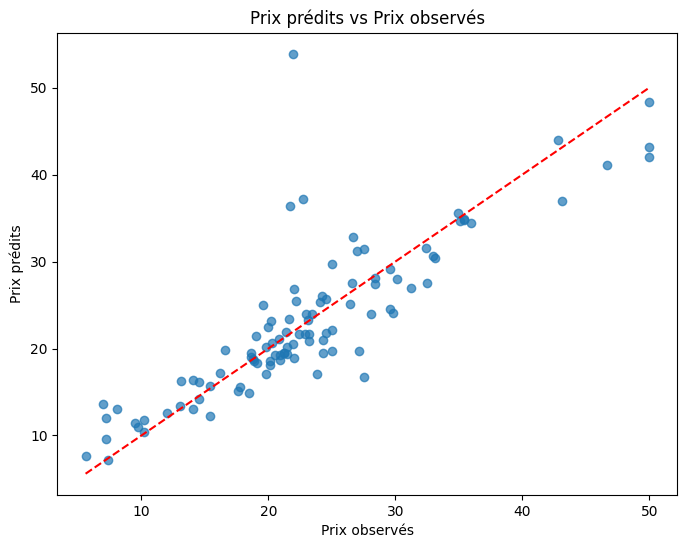

In [ ]:
# Tracer les valeurs prédites en fonction des valeurs observées
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.xlabel('Prix observés')
plt.ylabel('Prix prédits')
plt.title('Prix prédits vs Prix observés')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'r--')  # Ajouter une ligne de référence
plt.show()